In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile,join
from time import sleep
def P2dB(P): return 10*np.log10(np.abs(P))

In [2]:
fpath='xst_mean2'
files=listdir(fpath)#[f for f in listdir(fpath)];
files.sort()
files = [f for f in files if isfile(join(fpath,f))]
print(len(files))
print(files)
#files=['xst_lba1d.npz','xst_lba2.npz']
#print(files)


9
['t2_lba1r.npz', 't2_lba2.npz', 't2_lba3.npz', 't2_lba4.npz', 't2_lba5.npz', 't2_lba6.npz', 't2_lba7.npz', 't2_lba8.npz', 't2_lba9.npz']


In [5]:
D=[]
Cnt=[]
for fn in files:
    D2=np.load(fpath+"/"+fn)
    D.append(D2['xst'])
    Cnt.append(D2['cnt'])
D=np.array(D)
Cnt=np.array(Cnt)
print(D.shape,Cnt.shape)
print(Cnt[:,10])

(9, 512, 19, 19) (9, 512)
[1 2 1 1 1 1 1 1 1]


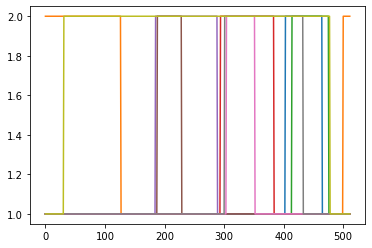

In [7]:
plt.plot(Cnt[:,:].T);

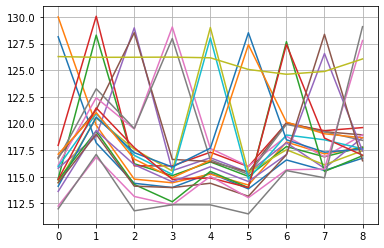

In [11]:
pwr=np.array([P2dB(np.sum(D[:,:,i,i],axis=1)+1) for i in range(19)])
plt.plot(pwr.T,'-')
plt.grid()

In [648]:
sis=[0,1,2,3,4,5,6]
ref=18
print(sis)

[0, 1, 2, 3, 4, 5, 6]


In [19]:
D2=np.array([D[x//2,:,18,x] for x in range(18)])
print(D2.shape)
    

(18, 512)


Text(0.5, 0, 'Frequency (MHz)')

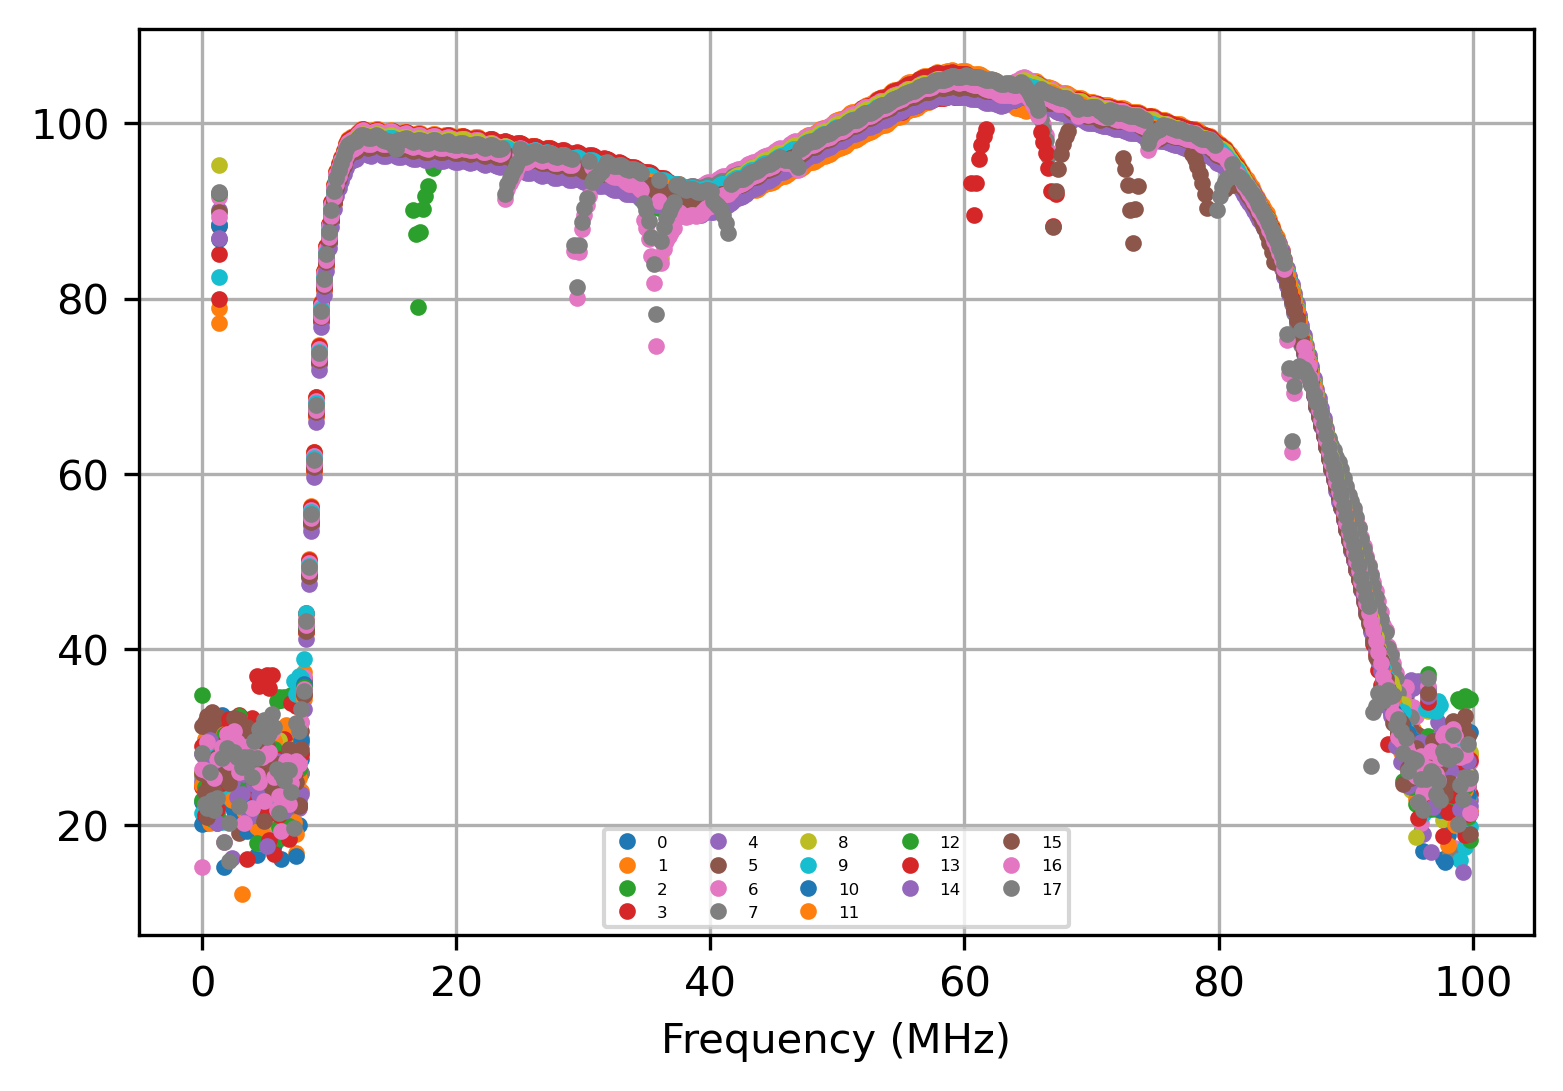

In [26]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i in range(18):
    plt.plot(freq,P2dB(D2[i]+1),'.',label='%i'%(i),linewidth=1)
plt.legend(fontsize=4,ncol=5)
plt.grid()
plt.xlabel("Frequency (MHz)")

Text(0, 0.5, 'Gain difference (dB)')

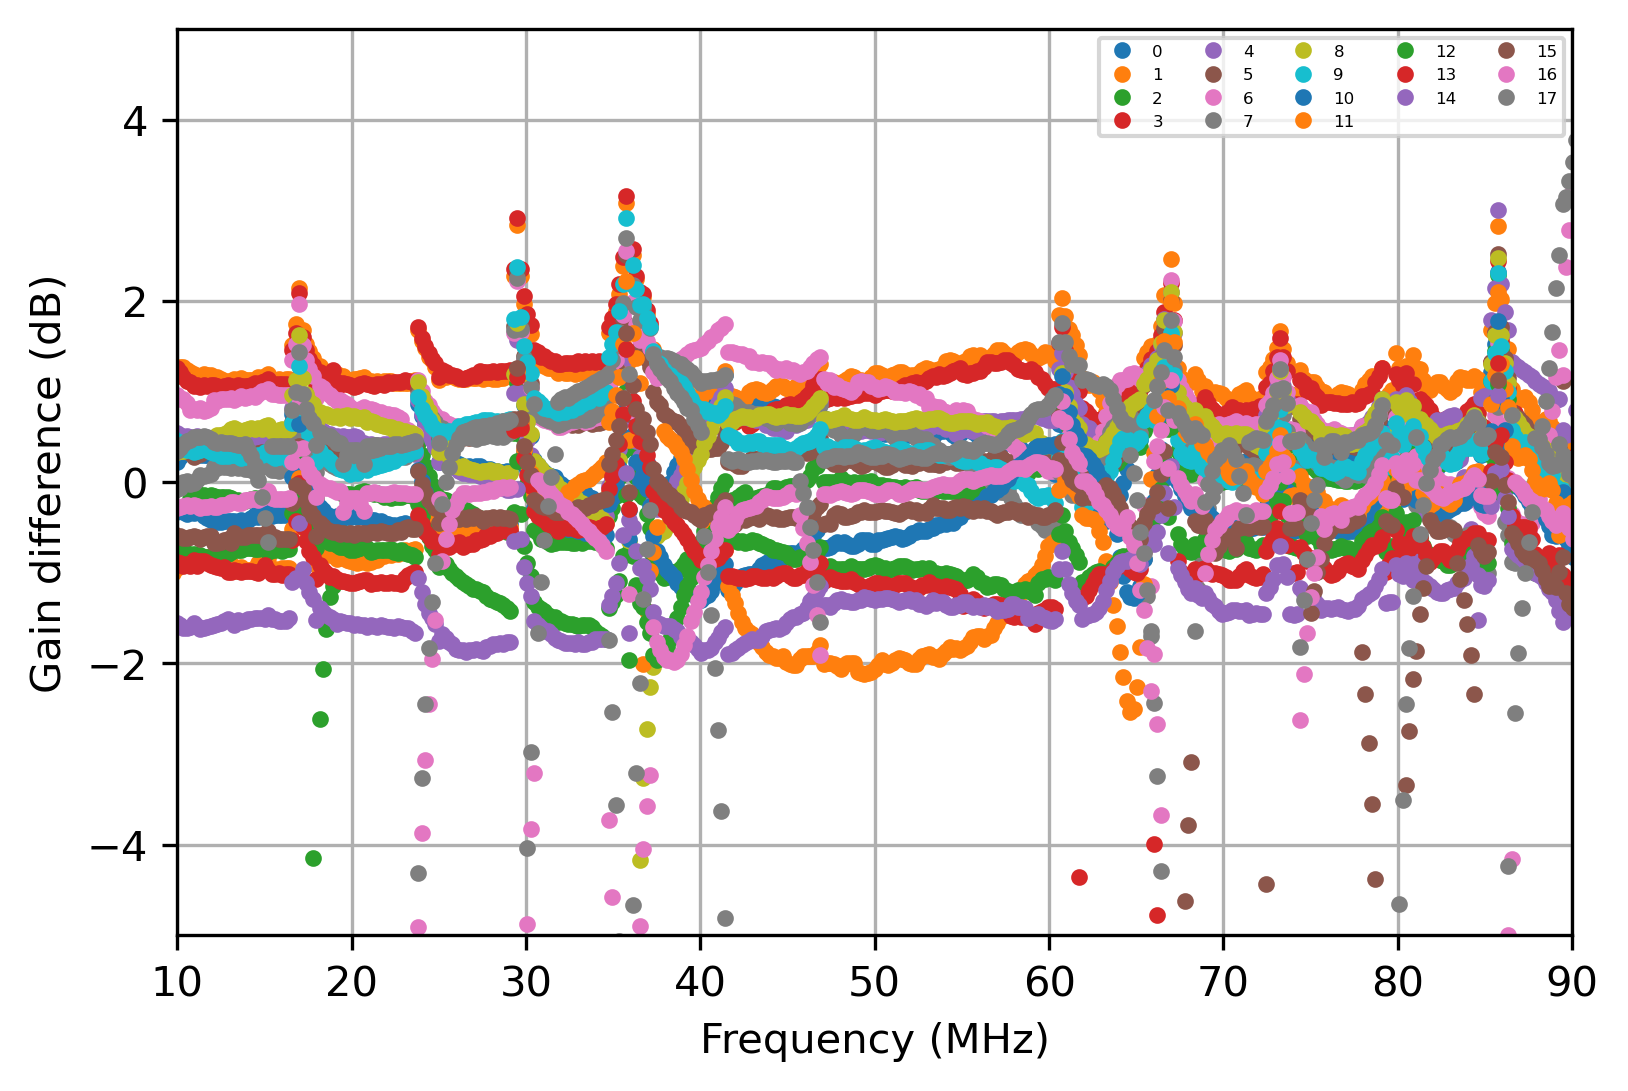

In [25]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
Gm=np.mean(P2dB(D2+1e-12),axis=0)
for i in range(18):
    plt.plot(freq,P2dB(D2[i]+1e-12)-Gm,'.',label='%i'%(i),linewidth=1)
plt.legend(fontsize=4,ncol=5)
plt.grid()
plt.ylim(-5,5)
plt.xlim(10,90)
plt.xlabel("Frequency (MHz)");plt.ylabel("Gain difference (dB)")

82.421875
Delay ns: [ 6.45685457  3.29329562 -1.34565792 -0.88381208 -1.29257817  3.93372761
 -1.35487199 -0.58695398 -1.21509496  2.64028322 -1.0826589   2.81539038
  3.79914009  2.58559774 -1.20104721 -0.8632767  -0.90194634 -0.7529706 ]


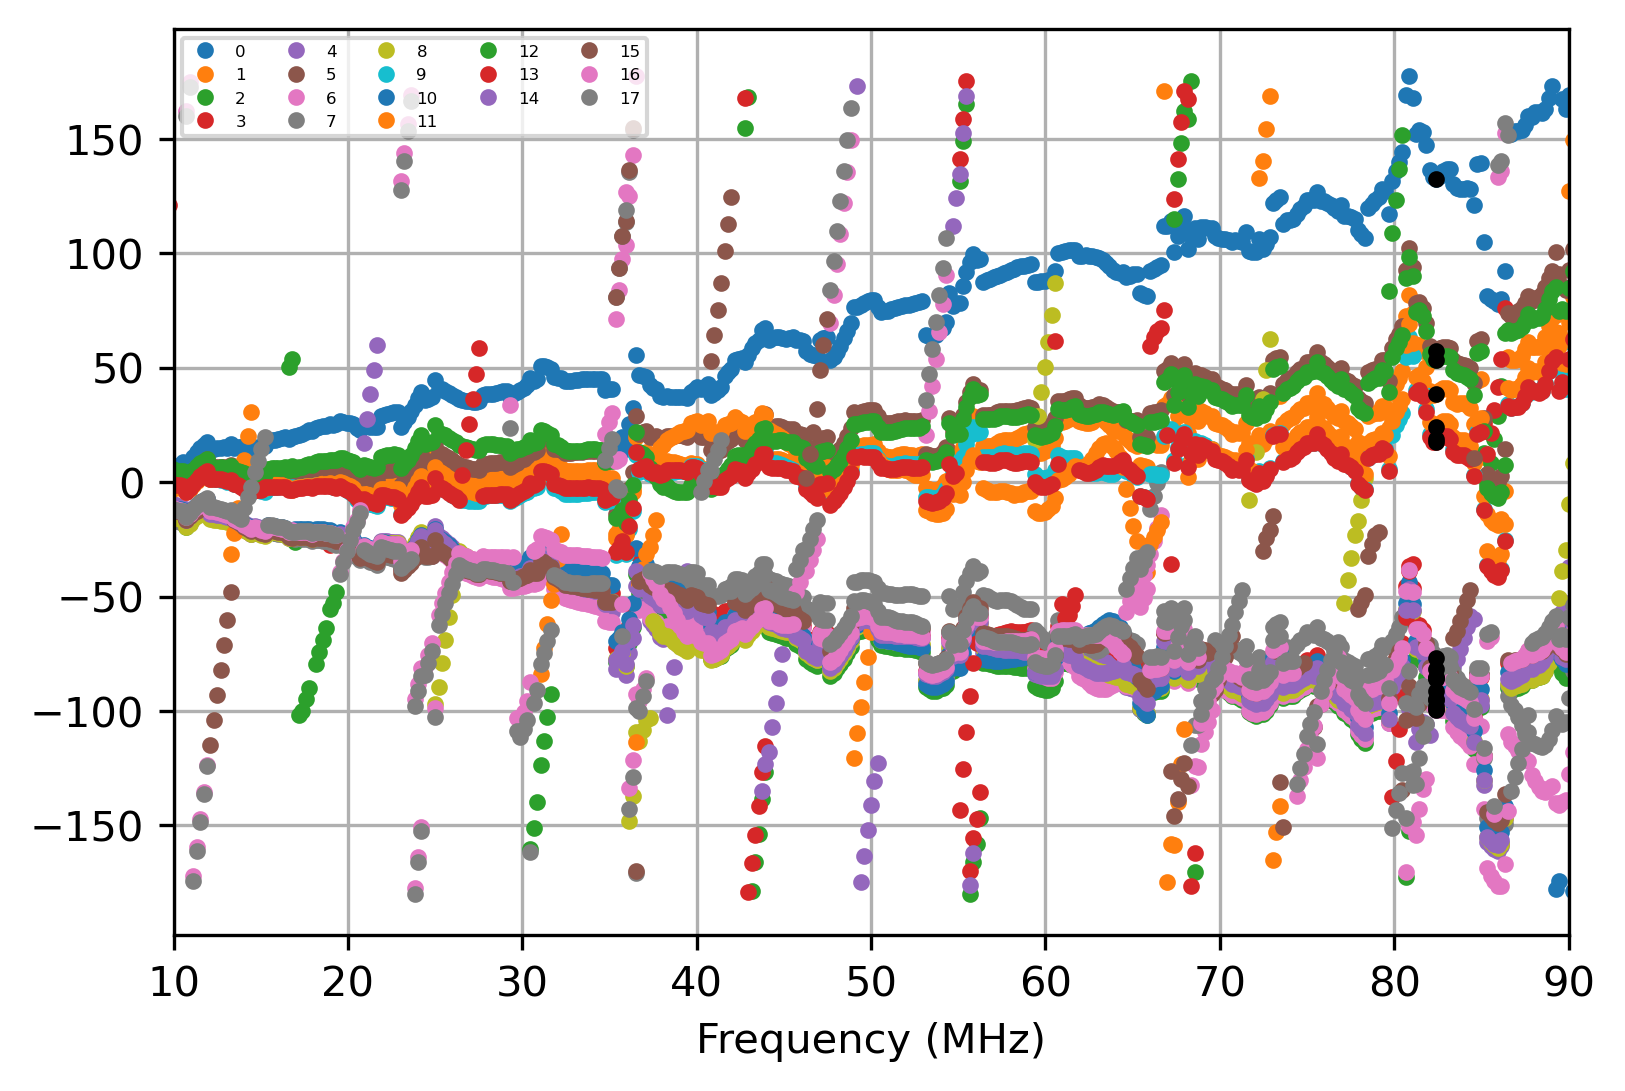

In [70]:
plt.figure(dpi=300)
Am=np.mean(D2,axis=0)
d0=2 #ns
d1=np.exp(2j*np.pi*freq*1e6*(d0)*1e-9)
for i in range(18):
    plt.plot(freq,np.angle(D2[i]/Am/d1)/np.pi*180,'.',label='%i'%(i),linewidth=1)
plt.legend(fontsize=4,ncol=5)
plt.grid()
plt.xlim(10,90)
#plt.ylim()
plt.xlabel("Frequency (MHz)")
i0=int(np.round(82.5*512/100))
print(freq[i0])
for i in range(18):
    plt.plot(freq[i0],np.angle(D2[i]/Am/d1)[i0]/np.pi*180,'k.')
delay_ns=np.angle(D2[:]/Am/d1)[:,i0]/freq[i0]*1e3/2/np.pi+d0
print('Delay ns:',delay_ns)

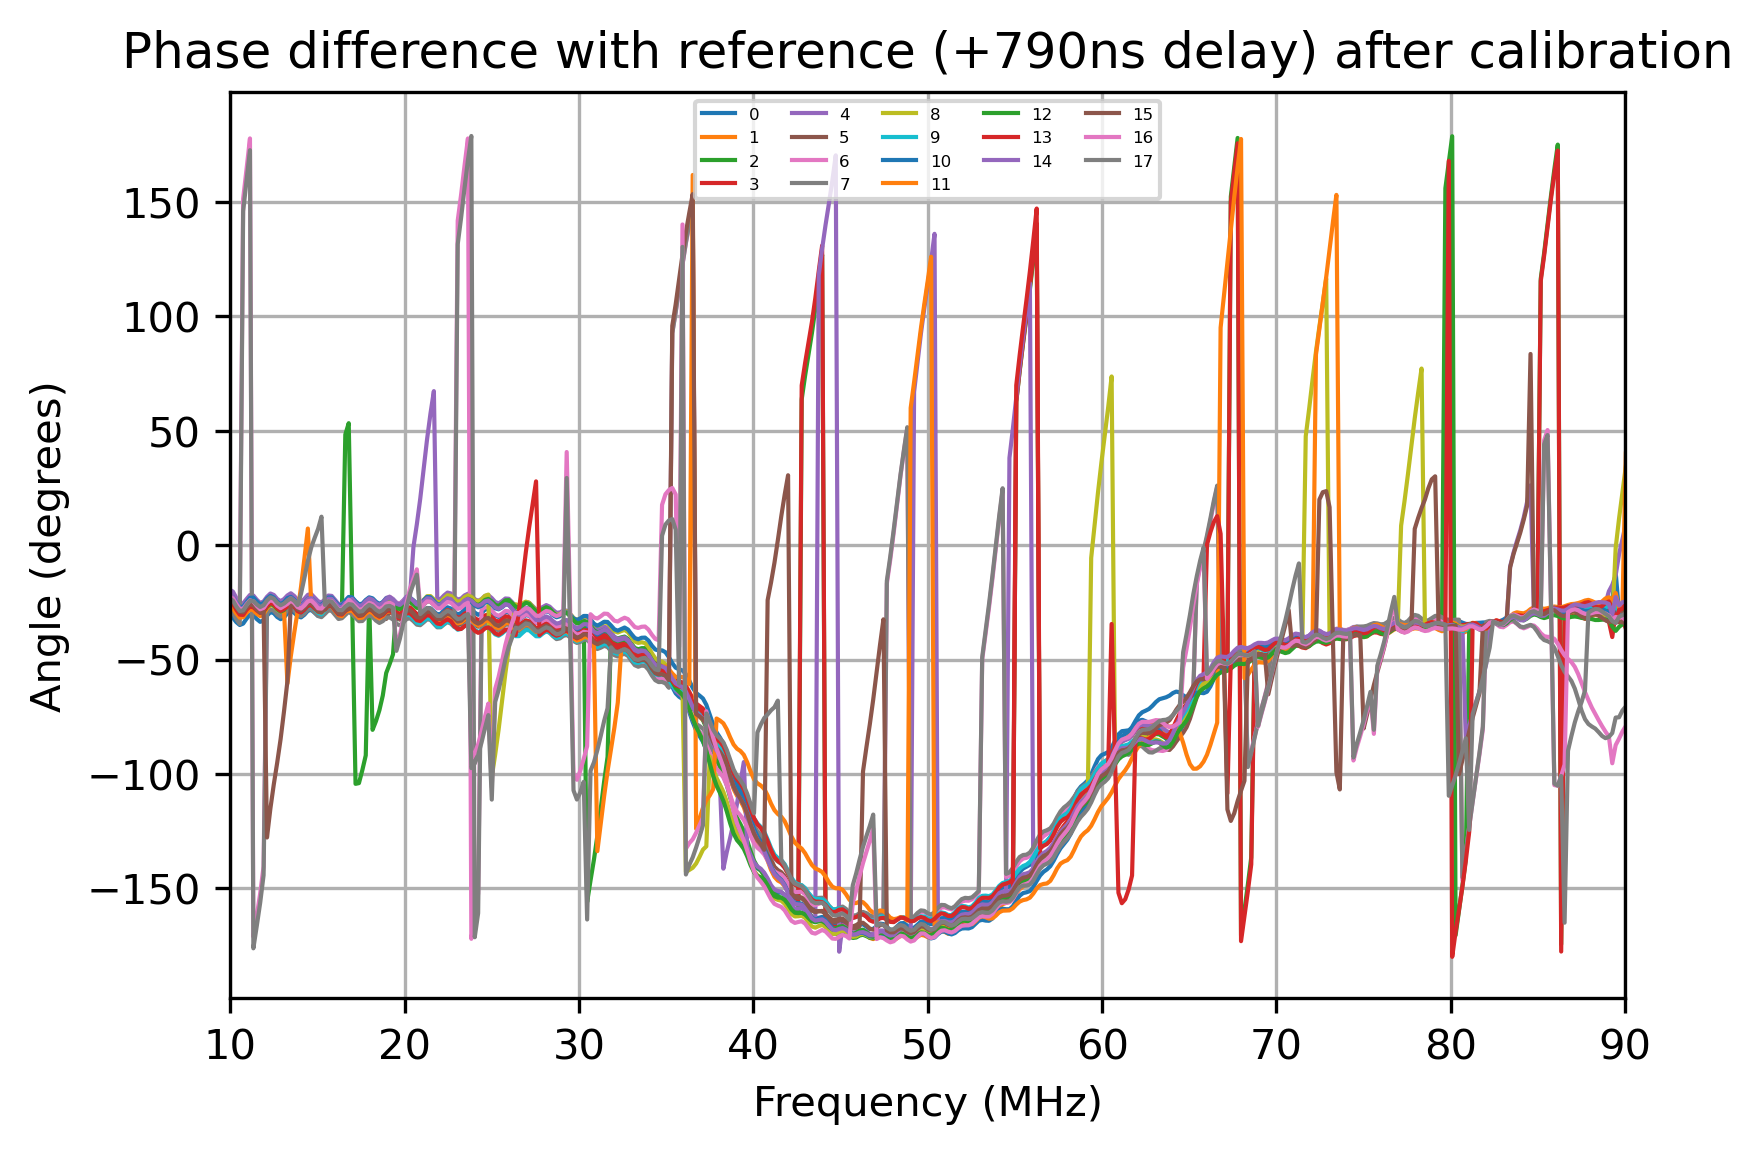

In [72]:
plt.figure(dpi=300)
d0=790 #ns
for i in range(18):
    d1=np.exp(2j*np.pi*freq*1e6*(d0+delay_ns[i])*1e-9)
    plt.plot(freq,np.angle(D2[i]/d1)/np.pi*180,'-',label='%i'%(i),linewidth=1)
plt.legend(fontsize=4,ncol=5)
plt.grid()
plt.xlim(10,90)
#plt.ylim(-50,50)
plt.xlabel("Frequency (MHz)");plt.ylabel("Angle (degrees)")
plt.title("Phase difference with reference (+790ns delay) after calibration");

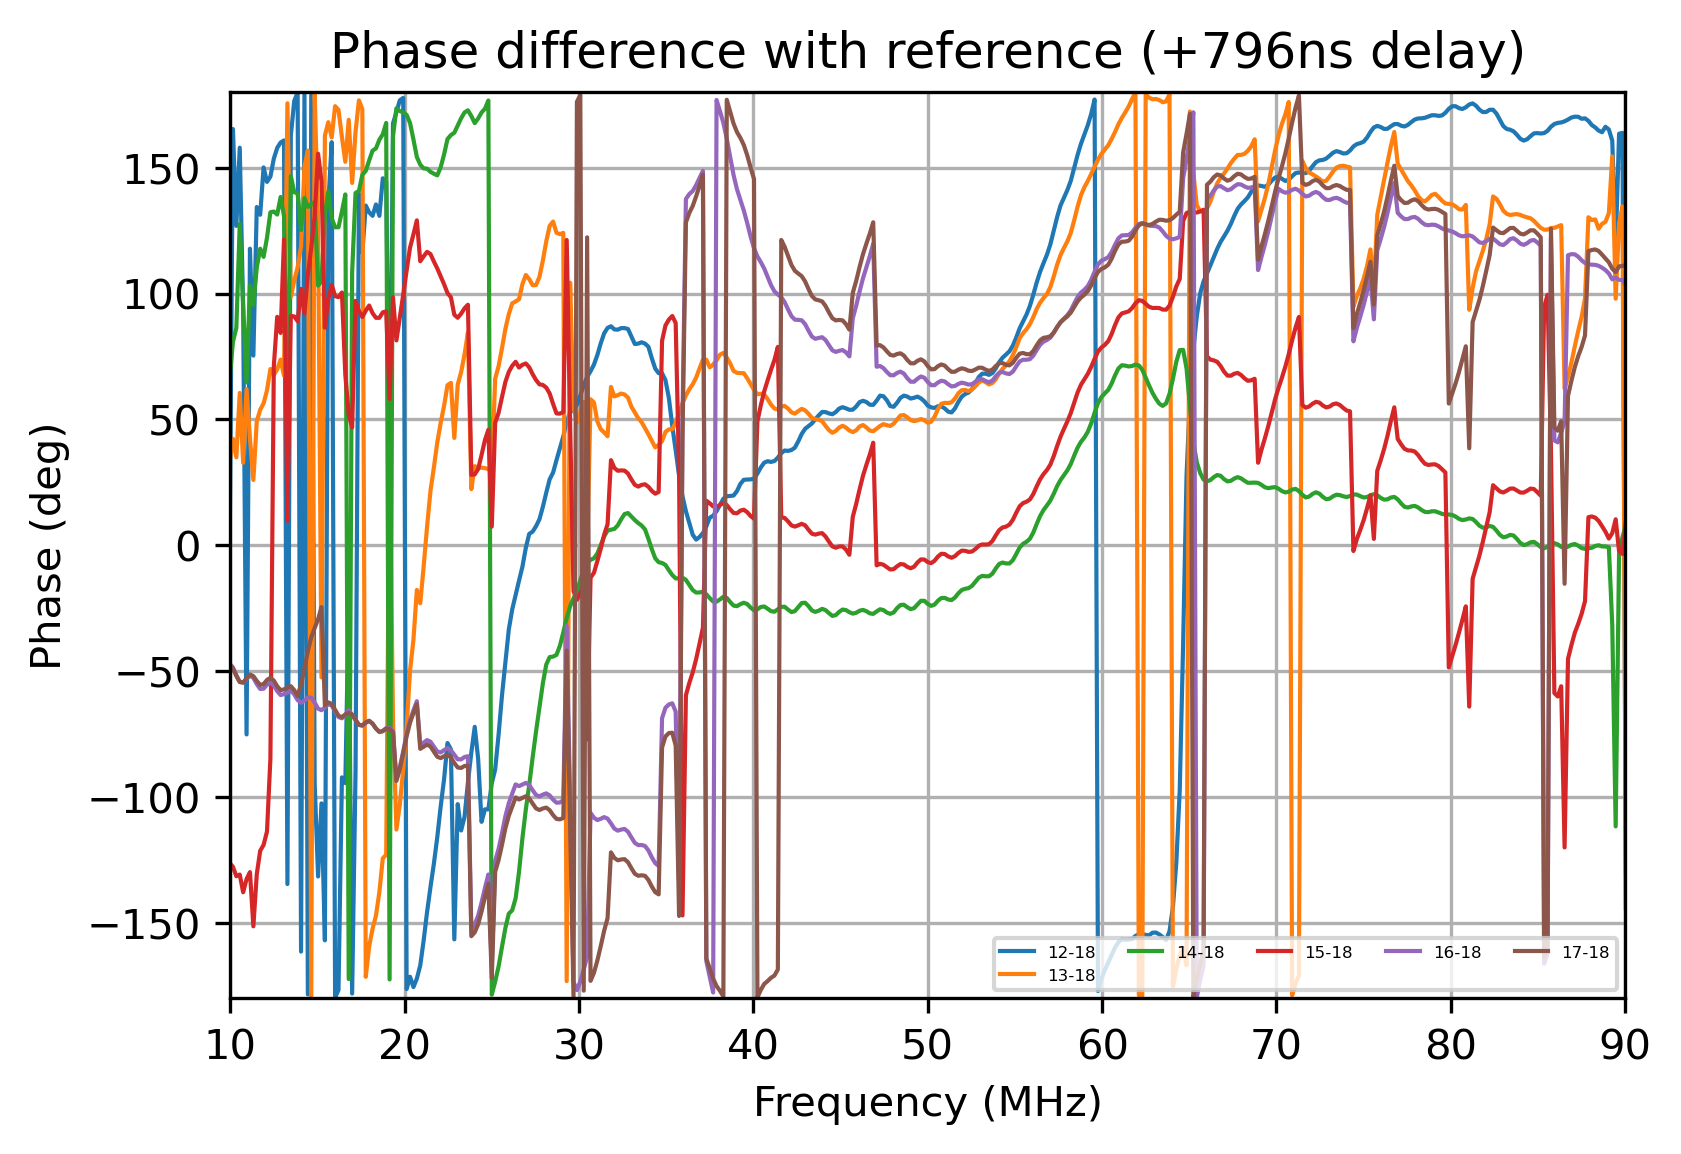

In [654]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
dx=20e-9
d0=796e-9
#d=[d0+dx,d0+dx,d0,d0,d0+dx,d0+dx];
#dx=25e-9
#d0=810e-9
#dx=25e-9
#dx=20e-9
#d0=830e-9
#d=[d0,d0-3e-9,d0+dx,d0+dx+1e-9,d0+2*dx,d0+2*dx+5e-9];
d=[d0+2*dx,d0+2*dx,d0+dx,d0+dx,d0,d0];
#d=830e-9;
for i,[p1,p2] in enumerate(pairs):
#    if PPwr[i]<Pcut: continue;
#    plt.plot(freq[1:],P2dB(np.roll(D2[:,p2,p1],-7)+1e-6)[1:],label='%i-%i'%(p1,p2),linewidth=0.05)
    d1=np.exp(2j*np.pi*freq*1e6*d[i])
    ph=np.angle(np.roll(D2[:,p2,p1]/d1,0))
#    print(ph[100])
#    if np.abs(ph[100])>np.pi/2: ph=np.angle(-np.roll(D2[:,p2,p1],0)/d1)

    plt.plot(freq[1:],ph[1:]/np.pi*180,label='%i-%i'%(p1,p2),linewidth=1)
#plt.plot(freq,np.angle(d))

plt.legend(fontsize=4,ncol=5)
plt.xlim(10,90)
plt.ylim(-180,180)
plt.grid()
plt.xlabel("Frequency (MHz)");plt.ylabel("Phase (deg)")
plt.title("Phase difference with reference (+796ns delay)");

Text(0.5, 0, 'Frequency (MHz)')

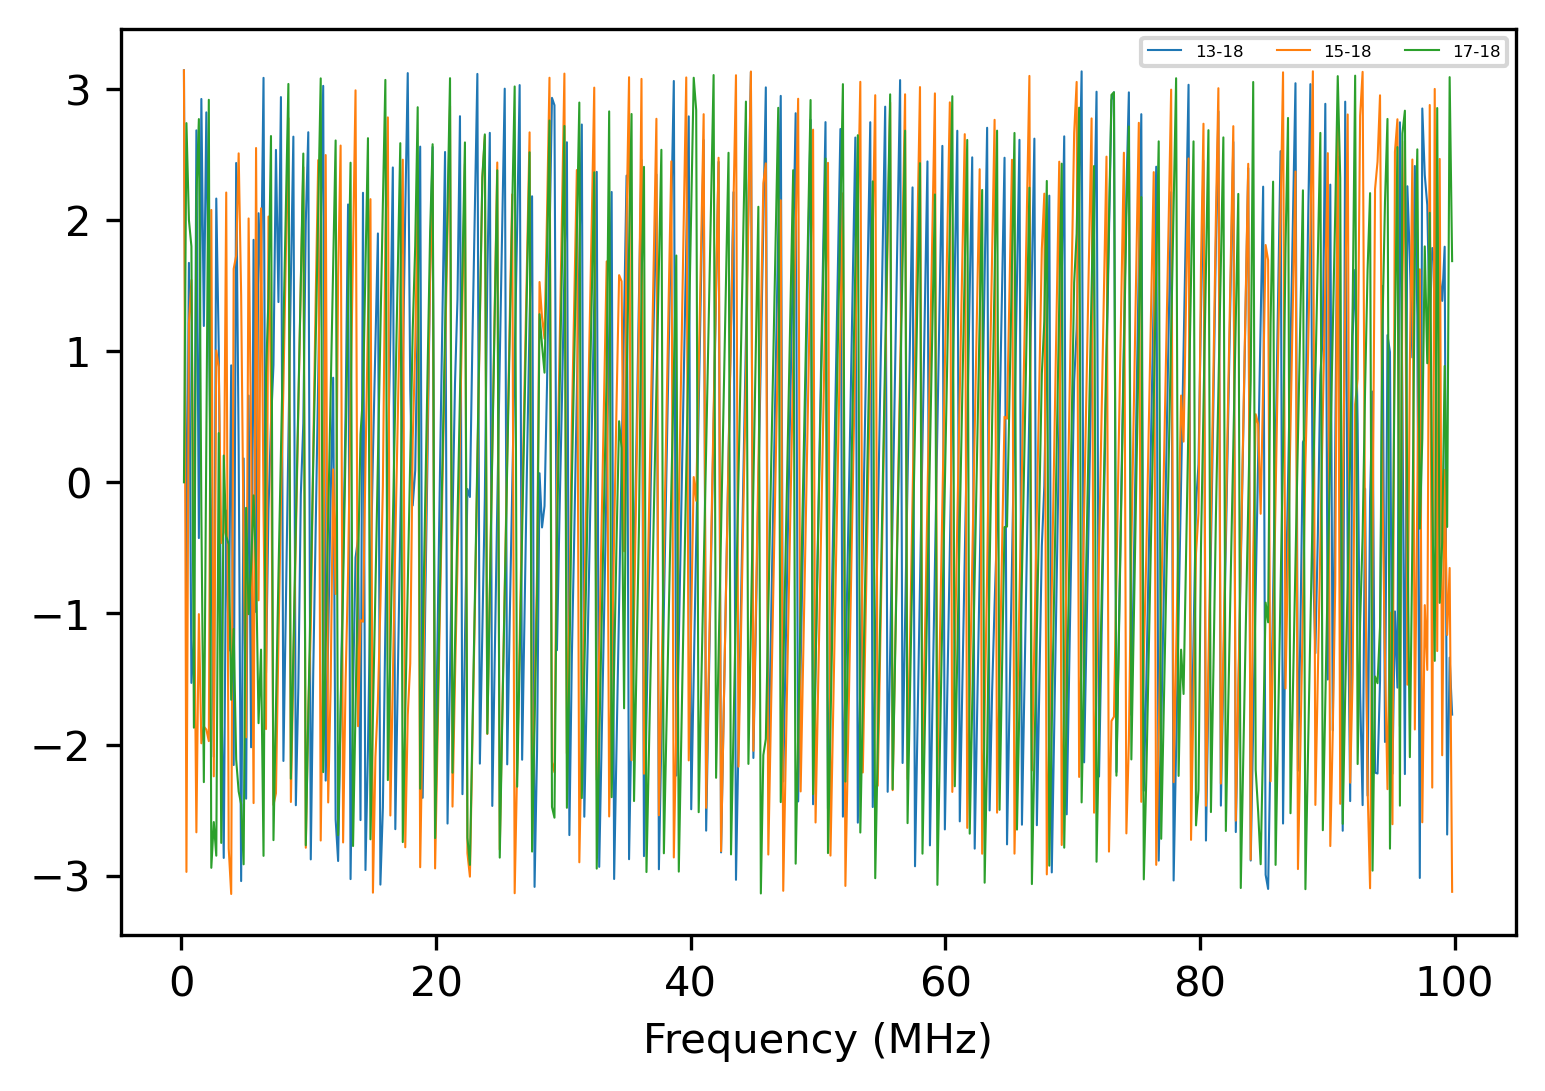

In [653]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs[1::2]):
#    if PPwr[i]<Pcut: continue;
#    plt.plot(freq[1:],P2dB(np.roll(D2[:,p2,p1],-7)+1e-6)[1:],label='%i-%i'%(p1,p2),linewidth=0.05)
    plt.plot(freq[1:],np.angle(np.roll(D2[:,p2,p1],-6))[1:],label='%i-%i'%(p1,p2),linewidth=0.5)
plt.legend(fontsize=4,ncol=5)
#plt.ylim(0,60)
plt.xlabel("Frequency (MHz)")

In [474]:
cntmean=(np.mean(np.sum(Cnt,axis=0)))
print(P2dB(cntmean**2))

26.353433339663972


Text(0.5, 1.0, 'RCU2L-QM in DTS outside: Correlation between \npairs of channels. LBA off')

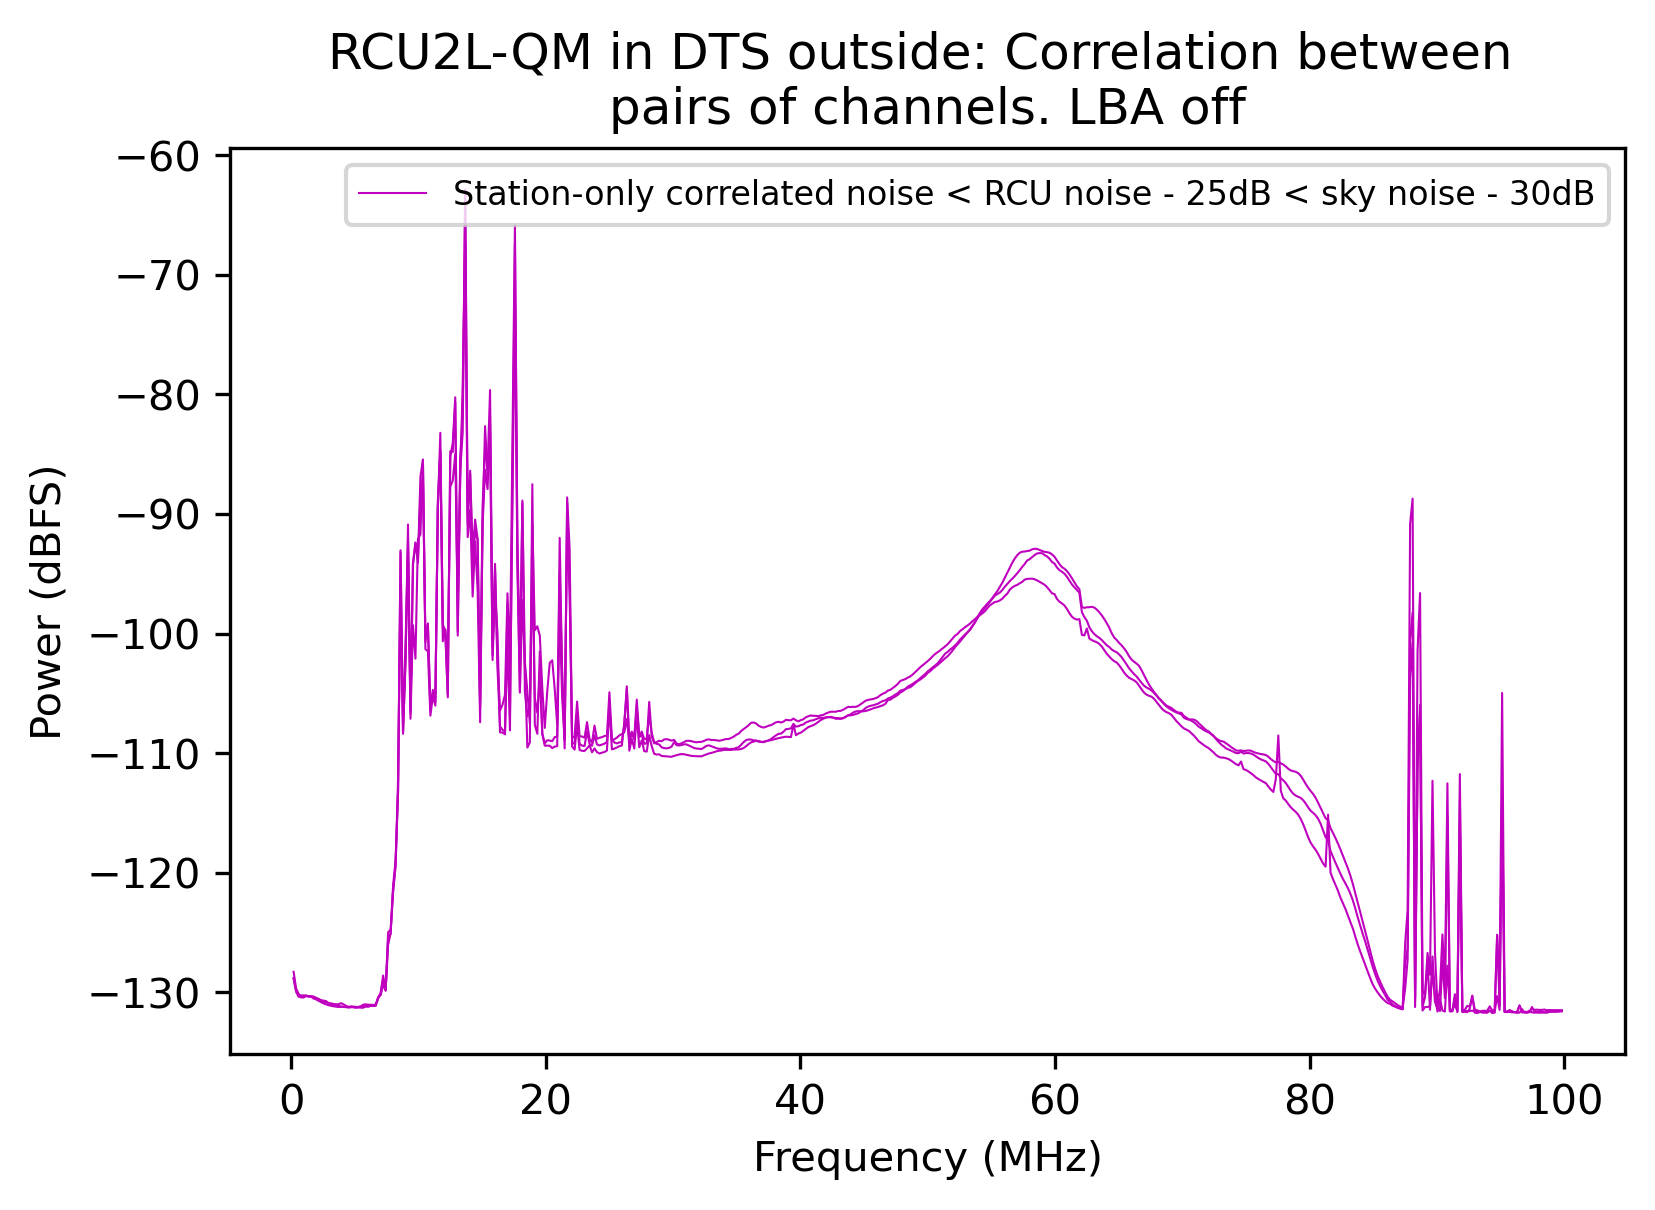

In [204]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
P1=np.zeros_like(freq[1:],dtype='float')
P2=np.zeros_like(freq[1:],dtype='complex')
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS

cnt=0;
for i,[p1,p2] in enumerate(pairs):
    if PPwr[i]>Pcut: continue;
    P1+=np.abs(np.roll(D2[:,p2,p1],-7)[1:])
    P2+=(np.roll(D2[:,p2,p1],-7)[1:])
    cnt+=1
    plt.plot(freq[1:],P2dB(np.roll(D2[:,p2,p1],-7)+1e-6)[1:]-GainADC,linewidth=0.1)
for i in sis[4:]:
    plt.plot(freq[1:],P2dB(np.roll(D2[:,i,i],-7))[1:]-30+5-GainADC,'m-',linewidth=0.5,label=('Station-only correlated noise < RCU noise - 25dB < sky noise - 30dB' if i==4 else ''))
#plt.plot(freq[1:],P2dB(P2/np.sqrt(cnt))-GainADC,'r-',linewidth=0.5,label='avg pwr')
#plt.plot(freq[1:],P2dB(P1/(cnt))-GainADC,'k-',linewidth=0.5,label='avg correlation')
plt.legend(fontsize=8,ncol=1)
#plt.ylim(0,30)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dBFS)")
plt.title("RCU2L-QM in DTS outside: Correlation between \npairs of channels. LBA off")

Text(0.5, 0, 'Frequency (MHz)')

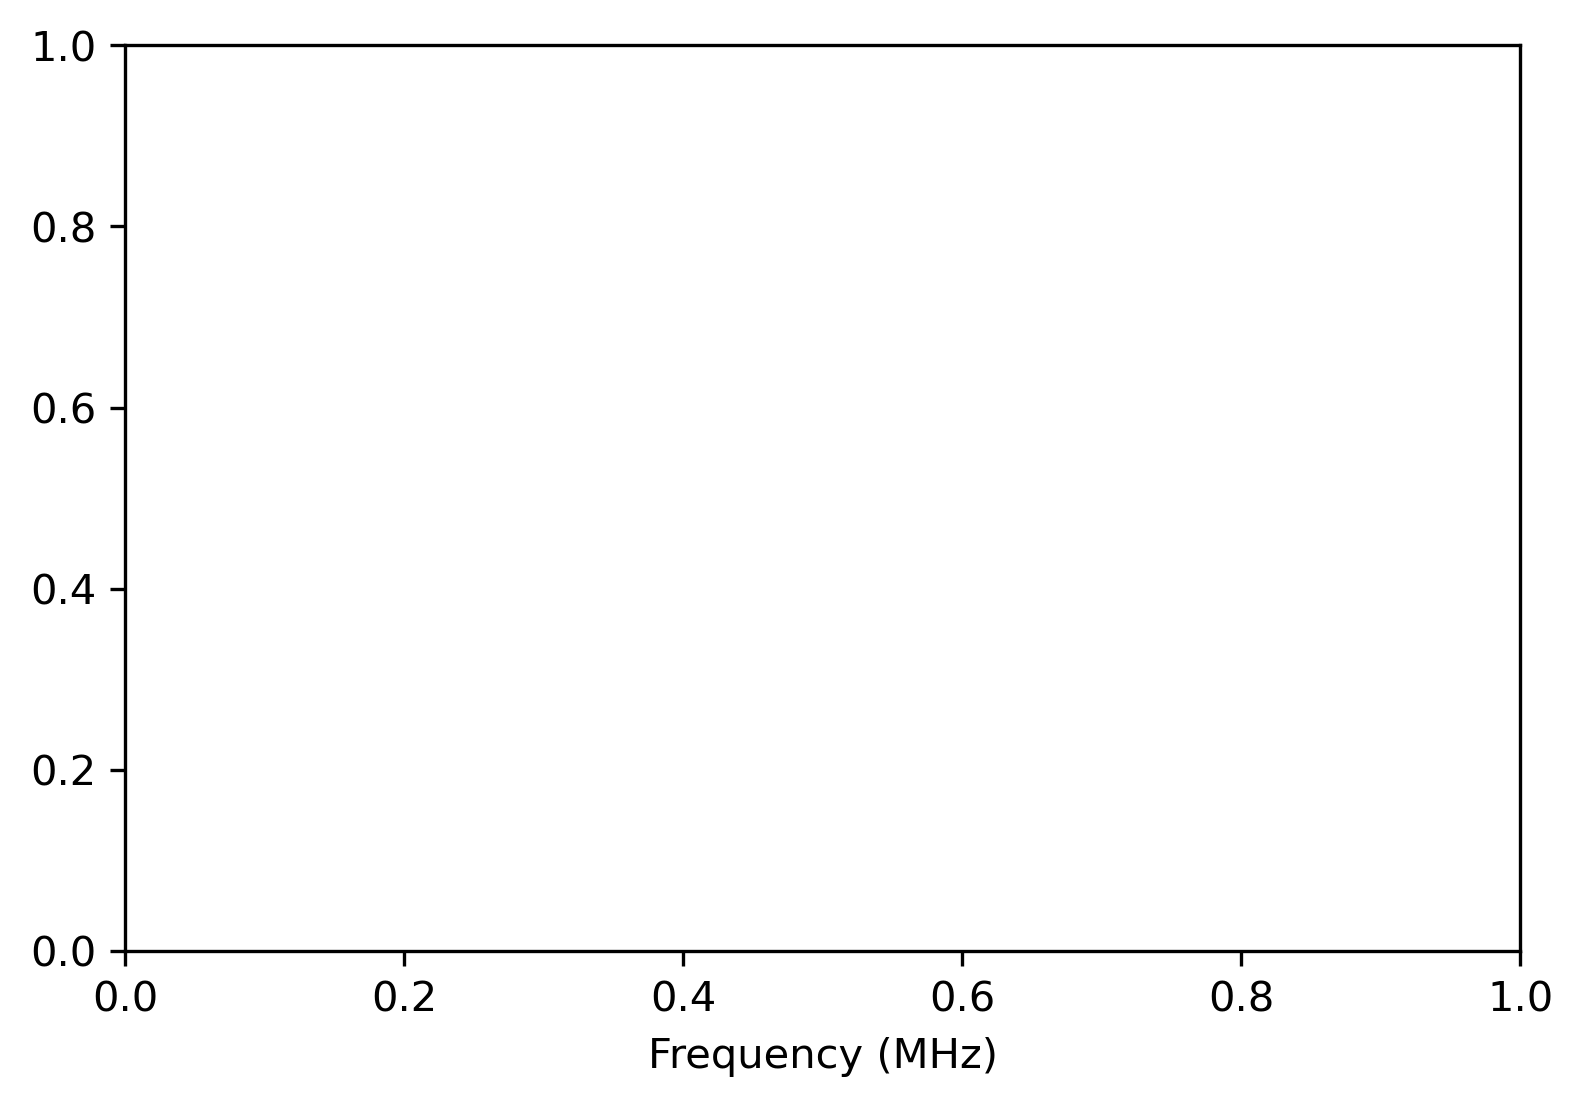

In [14]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs):
    if PPwr[i]>Pcut: continue;
    plt.plot(freq[1:],np.angle(np.roll(D2[:,p2,p1],-7)+1e-6)[1:],'.',markersize=0.2,label='%i-%i'%(p1,p2),linewidth=0.05)
#plt.legend(fontsize=4,ncol=5)
#plt.ylim(0,60)
plt.xlabel("Frequency (MHz)")